In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("plagiarism_pairs.csv")  

In [13]:
# TF-IDF vectorización
corpus = df['code1'].tolist() + df['code2'].tolist()
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', lowercase=False)
tfidf_matrix = vectorizer.fit_transform(corpus)

# Separar vectores
X1 = tfidf_matrix[:len(df)]
X2 = tfidf_matrix[len(df):]

# Similitud coseno
similarities = []
for i in range(len(df)):
    sim = cosine_similarity(X1[i], X2[i])[0][0]
    similarities.append(sim)

# Predicción basada en umbral 
threshold = 0.5
df['Similitud_Coseno'] = similarities
df['Predicción_Plagio'] = df['Similitud_Coseno'].apply(lambda x: 1 if x >= threshold else 0)


              precision    recall  f1-score   support

   No Plagio       0.66      0.92      0.77       660
      Plagio       0.87      0.52      0.65       652

    accuracy                           0.72      1312
   macro avg       0.76      0.72      0.71      1312
weighted avg       0.76      0.72      0.71      1312



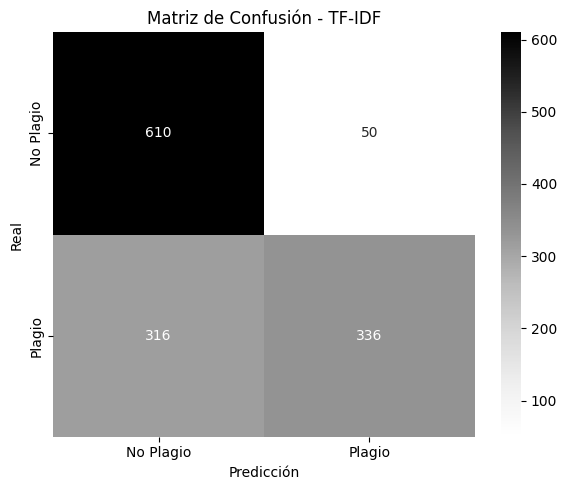

In [15]:
# MÉTRICAS Y MATRIZ DE CONFUSIÓN
y_true = df['label']
y_pred = df['Predicción_Plagio']

# Imprimir métricas
print(classification_report(y_true, y_pred, target_names=['No Plagio', 'Plagio']))

# Graficar matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Grays',
            xticklabels=['No Plagio', 'Plagio'],
            yticklabels=['No Plagio', 'Plagio'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - TF-IDF')
plt.tight_layout()
plt.show()